## 0. Install and Import Dependencies

In [ ]:
#!pip install easyocr
#!pip install imutils

In [1]:
import time

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import pytesseract
from scipy import ndimage

## 1. Read in Image, Grayscale and Blur

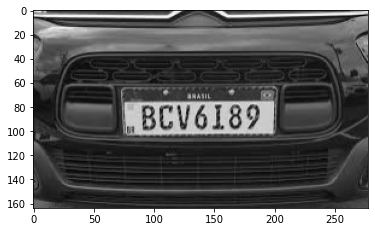

In [2]:
img = cv2.imread('image6.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

## 2. Apply filter and find edges for localization

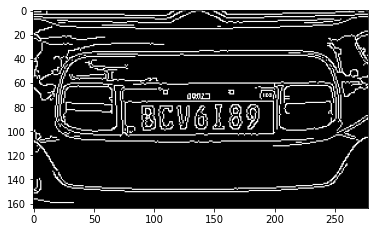

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [4]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [6]:
location

array([[[ 76,  77]],

       [[198,  75]],

       [[199, 101]],

       [[ 79, 104]]], dtype=int32)

In [7]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

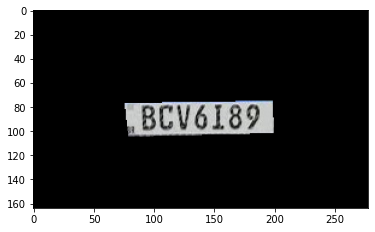

In [8]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [9]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

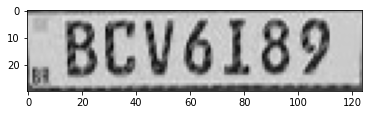

In [10]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [61]:
threshold = (cropped_image.max() + cropped_image.min()) / 2
print(threshold)
print(to_show.mean())
def myfunc(x):
    global threshold
    if x > threshold:
        return 255
    return 0

116.5
182.54650537634407


In [48]:
im_max = cropped_image.max()
def myfunc2(x):
    global im_max
    return (x*255/im_max)

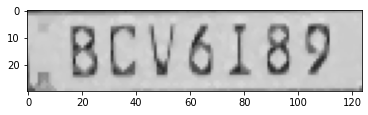

In [49]:
to_show = ndimage.median_filter(cropped_image, 2)
to_show = ndimage.median_filter(to_show, 2)
plt.imshow(cv2.cvtColor(to_show, cv2.COLOR_BGR2RGB))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


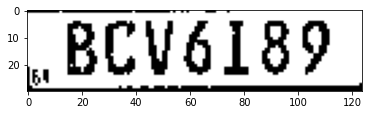

In [62]:
#to_show = ndimage.median_filter(cropped_image, 4)
#to_show = ndimage.median_filter(to_show, 2)
#print(to_show.max())
#print(to_show.min())

myfunc_vec = np.vectorize(myfunc)
result = myfunc_vec(cropped_image)

img_float32 = np.float32(result)
lab_image = cv2.cvtColor(img_float32, cv2.COLOR_BGR2RGB)

#print(result)
#print(to_show)
#print(lab_image)
plt.imshow(cv2.cvtColor(img_float32, cv2.COLOR_BGR2RGB))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


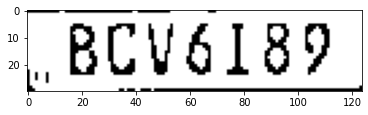

In [64]:
to_show = ndimage.median_filter(img_float32, 2)
plt.imshow(cv2.cvtColor(to_show, cv2.COLOR_BGR2RGB))

len 13
rectArea: 1 imgArea: 3720 % area: 0.00026881720430107527
rectArea: 12 imgArea: 3720 % area: 0.0032258064516129032
rectArea: 21 imgArea: 3720 % area: 0.00564516129032258
rectArea: 1488 imgArea: 3720 % area: 0.4
rectArea: 200 imgArea: 3720 % area: 0.053763440860215055
(87, 4, 10, 20)
rectArea: 180 imgArea: 3720 % area: 0.04838709677419355
(73, 4, 9, 20)
rectArea: 200 imgArea: 3720 % area: 0.053763440860215055
(58, 4, 10, 20)
rectArea: 200 imgArea: 3720 % area: 0.053763440860215055
(44, 4, 10, 20)
rectArea: 220 imgArea: 3720 % area: 0.05913978494623656
(29, 4, 11, 20)
rectArea: 231 imgArea: 3720 % area: 0.062096774193548386
(15, 4, 11, 21)
rectArea: 231 imgArea: 3720 % area: 0.062096774193548386
(101, 3, 11, 21)
rectArea: 1 imgArea: 3720 % area: 0.00026881720430107527
rectArea: 1 imgArea: 3720 % area: 0.00026881720430107527


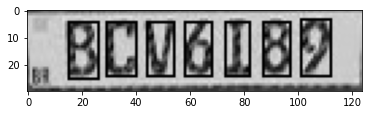

In [53]:
# Deep copy for results:
inputImageCopy = cropped_image.copy()

# Convert BGR to grayscale:
grayscaleImage = cropped_image #cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Threshold via Otsu:
threshValue, binaryImage = cv2.threshold(grayscaleImage, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Flood-fill border, seed at (0,0) and use black (0) color:
cv2.floodFill(binaryImage, None, (0, 0), 0)

# Get each bounding box
# Find the big contours/blobs on the filtered image:
contours, hierarchy = cv2.findContours(binaryImage, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rects = []
minArea = 0.03 # 3% do tamanho total, arbitrário
maxArea = 0.3 # 10% do tamanho total, arbitrário
image = cropped_image.copy()
imgArea = image.shape[0] * image.shape[1]
print('len', len(contours))
for _, c in enumerate(contours):
    boundRect = cv2.boundingRect(c)
    rectX = boundRect[0]
    rectY = boundRect[1]
    rectWidth = boundRect[2]
    rectHeight = boundRect[3]
    #plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    rectArea = rectWidth * rectHeight 
    print('rectArea:', rectArea, 'imgArea:', imgArea, '% area:', rectArea/imgArea)
    if  rectArea/imgArea > minArea and rectArea/imgArea < maxArea:
        print(boundRect)
        rects.append(boundRect)
        image = cv2.rectangle(image, (rectX, rectY), (rectX + rectWidth, rectY + rectHeight), (0,0,0), 1)
        #print(rectWidth * rectHeight)
        #print(image.shape[0] * image.shape[1])
        #print((rectWidth * rectHeight) / (image.shape[0] * image.shape[1]))
#plt.figure()
#plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [65]:
#usando pytesseract
rects = sorted(rects, key=lambda x: x[0])
config = r'--oem 3 --psm 6'
pytesseract.pytesseract.tesseract_cmd = r'D:\PROGRAMAS\Tesseract-OCR\tesseract.exe'
for boundRect in rects:
    rectX = boundRect[0] -5 if boundRect[0] -5 >= 0 else boundRect[0]  
    rectY = boundRect[1] - 5 if boundRect[1] -5 >= 0 else boundRect[1]
    rectWidth = boundRect[2] + 10
    rectHeight = boundRect[3] + 10
    to_show = cropped_image[rectY: rectY + rectHeight, rectX: rectX + rectWidth]
    #readed = reader.readtext(to_show, detail = 0, allowlist = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ',width_ths = 1.5, text_threshold=0.8)
    #print(readed)
    print(pytesseract.image_to_string(to_show, config=config), end = ' ')

NameError: name 'rects' is not defined

In [31]:
#usando easyocr
rects = sorted(rects, key=lambda x: x[0])
reader = easyocr.Reader(['en'])
print(len(rects))
for boundRect in rects:
    rectX = boundRect[0] -5 if boundRect[0] -5 >= 0 else boundRect[0]  
    rectY = boundRect[1] - 5 if boundRect[1] -5 >= 0 else boundRect[1]
    rectWidth = boundRect[2] + 10
    rectHeight = boundRect[3] + 10
    to_show = cropped_image[rectY: rectY + rectHeight, rectX: rectX + rectWidth]
    #print(to_show)
    #readed = reader.readtext(to_show, detail = 0, allowlist = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ',width_ths = 1.5, text_threshold=0.8)
    #print(readed)
    print(reader.readtext(to_show))

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


8
[]
[]
[([[2, 4], [29, 4], [29, 44], [2, 44]], 'R', 0.998877721174555)]
[([[2, 2], [29, 2], [29, 45], [2, 45]], 'M', 0.9956937995202821)]
[([[0, 2], [26, 2], [26, 42], [0, 42]], '7', 0.9997003302999161)]
[([[2, 0], [30, 0], [30, 42], [2, 42]], 'E', 0.9994206075917056)]
[([[0, 2], [28, 2], [28, 44], [0, 44]], '3', 0.9999639991185774)]
[([[0, 2], [29, 2], [29, 44], [0, 44]], '3', 0.9999149487190977)]


In [27]:
def binarize(x):
    if x > 127:
        return 255
    return 0

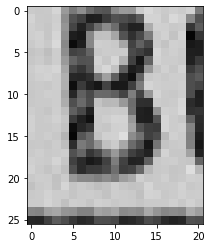

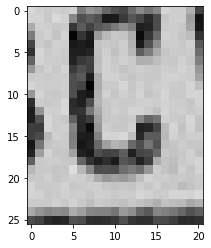

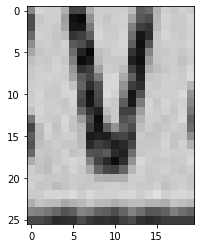

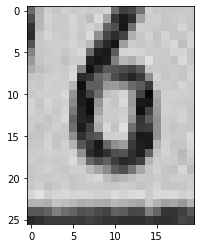

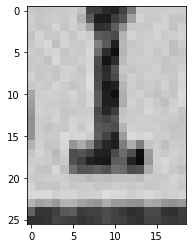

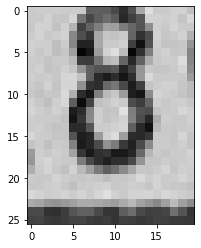

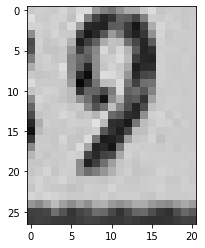

In [57]:
#tratando as imagens

for boundRect in rects:
    rectX = boundRect[0] -5 if boundRect[0] -5 >= 0 else boundRect[0]  
    rectY = boundRect[1] - 5 if boundRect[1] -5 >= 0 else boundRect[1]
    rectWidth = boundRect[2] + 10
    rectHeight = boundRect[3] + 10
    to_show = cropped_image[rectY: rectY + rectHeight, rectX: rectX + rectWidth]
    
    #tests
    #to_show = ndimage.median_filter(to_show, 2)
    #to_show = ndimage.median_filter(to_show, 2)
    #to_show = binarize(to_show)
    plt.figure()
    plt.imshow(cv2.cvtColor(to_show, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [188]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[14, 0], [194, 0], [194, 47], [14, 47]], 'QRMZE33', 0.7610060724837223)]

## 5. Render Result

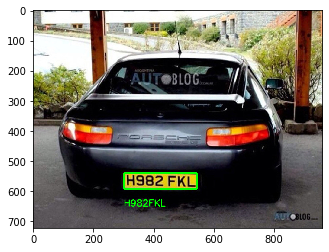

In [100]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))